In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from ydata_profiling import ProfileReport

In [13]:
df_ts=pd.read_csv("/content/train.csv",parse_dates=["date_time"], index_col="date_time")

In [7]:
! pip install ydata-profiling

In [39]:
df_ts.head(19)

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
2010-03-10 23:00:00,11.2,56.8,0.7848,1220.9,697.5,1417.2,1462.6,949.0,1.2,4.4,88.1
2010-03-11 00:00:00,10.7,55.7,0.7603,1244.2,669.3,1491.2,1413.0,769.6,1.2,3.7,59.5
2010-03-11 01:00:00,10.3,57.0,0.7702,1181.4,631.7,1511.1,1359.7,715.4,1.0,3.4,63.9
2010-03-11 02:00:00,10.1,62.7,0.7648,1159.6,602.9,1610.6,1212.2,657.2,0.9,2.2,46.4


In [19]:
df_ts.shape

(7111, 11)

In [15]:
profile = ProfileReport(df_ts)

In [ ]:
profile.to_file("df_ts.html")

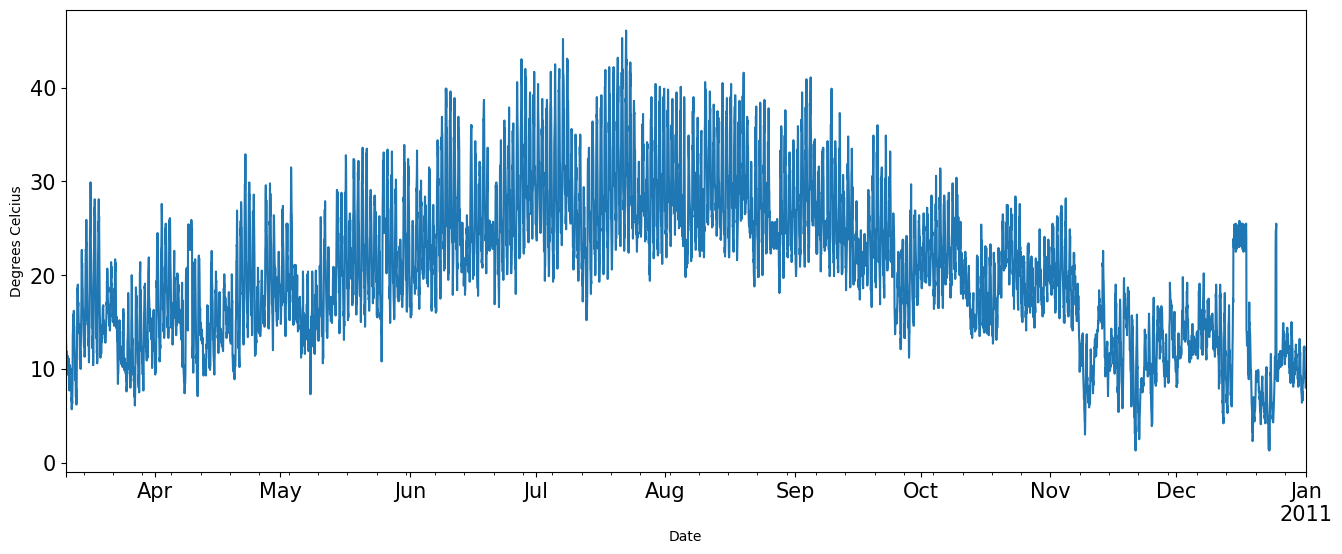

In [18]:
df_ts["deg_C"].plot(figsize=(16, 6), fontsize=15)
plt.xlabel("Date")
plt.ylabel("Degrees Celcius");

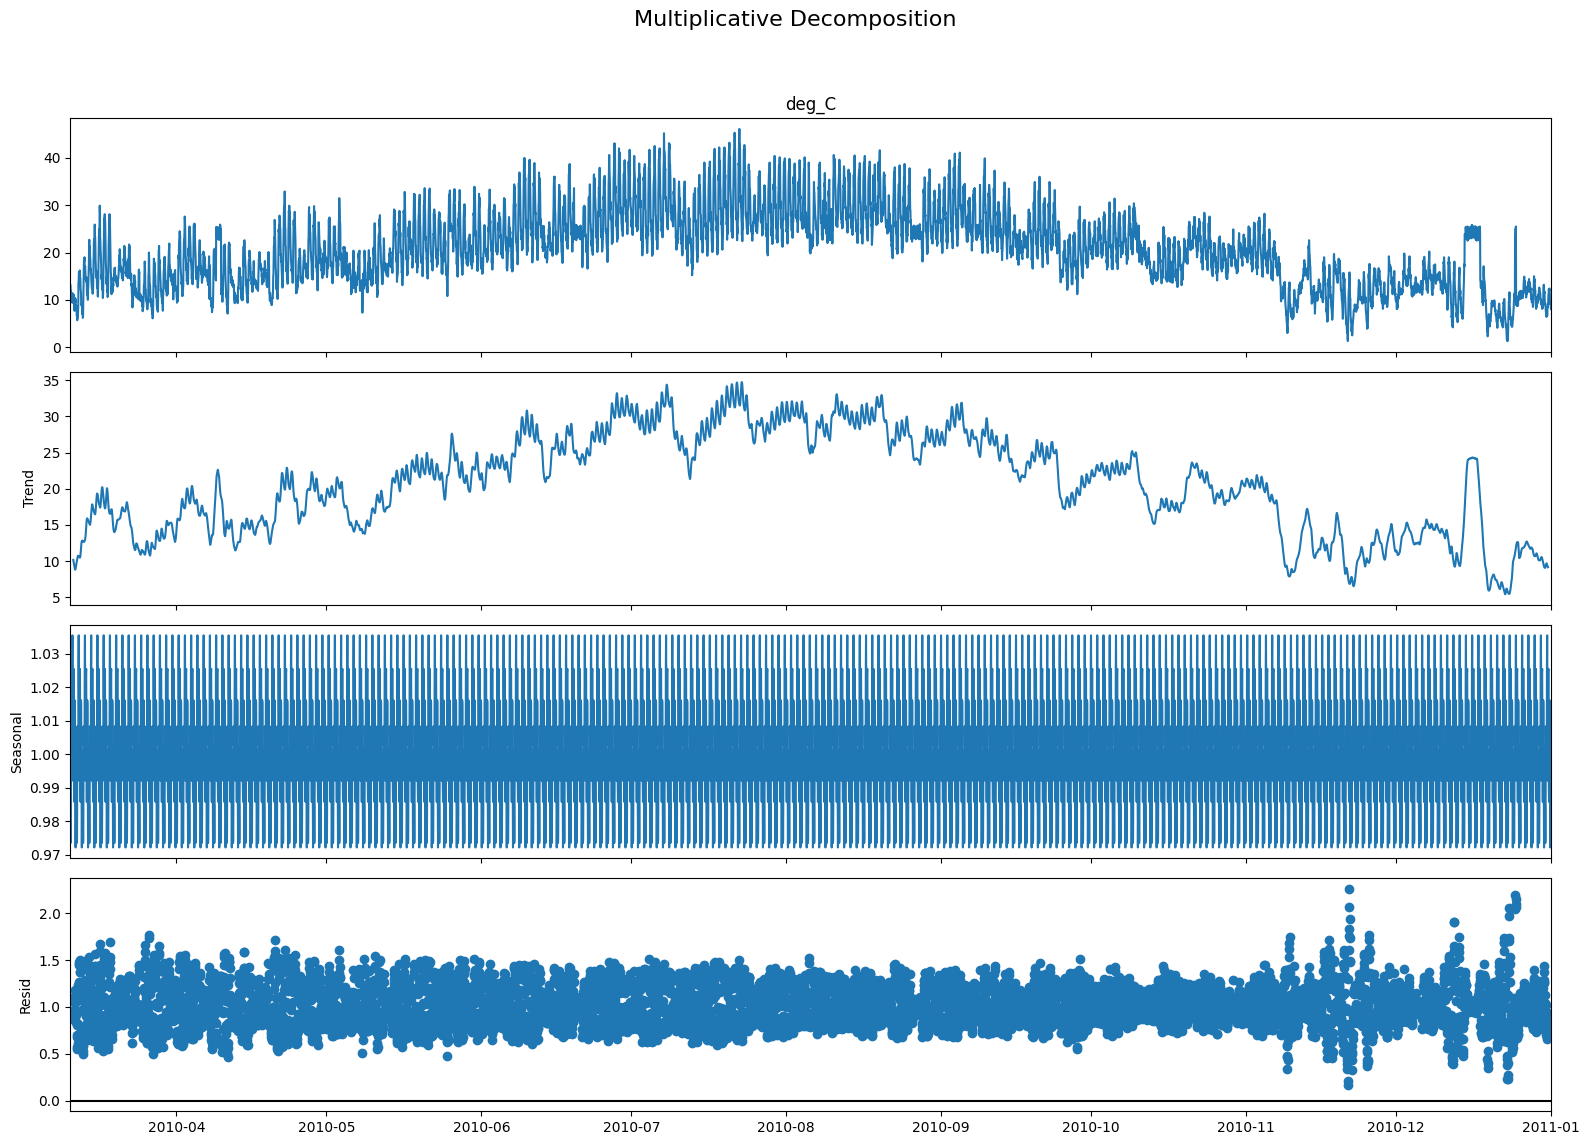

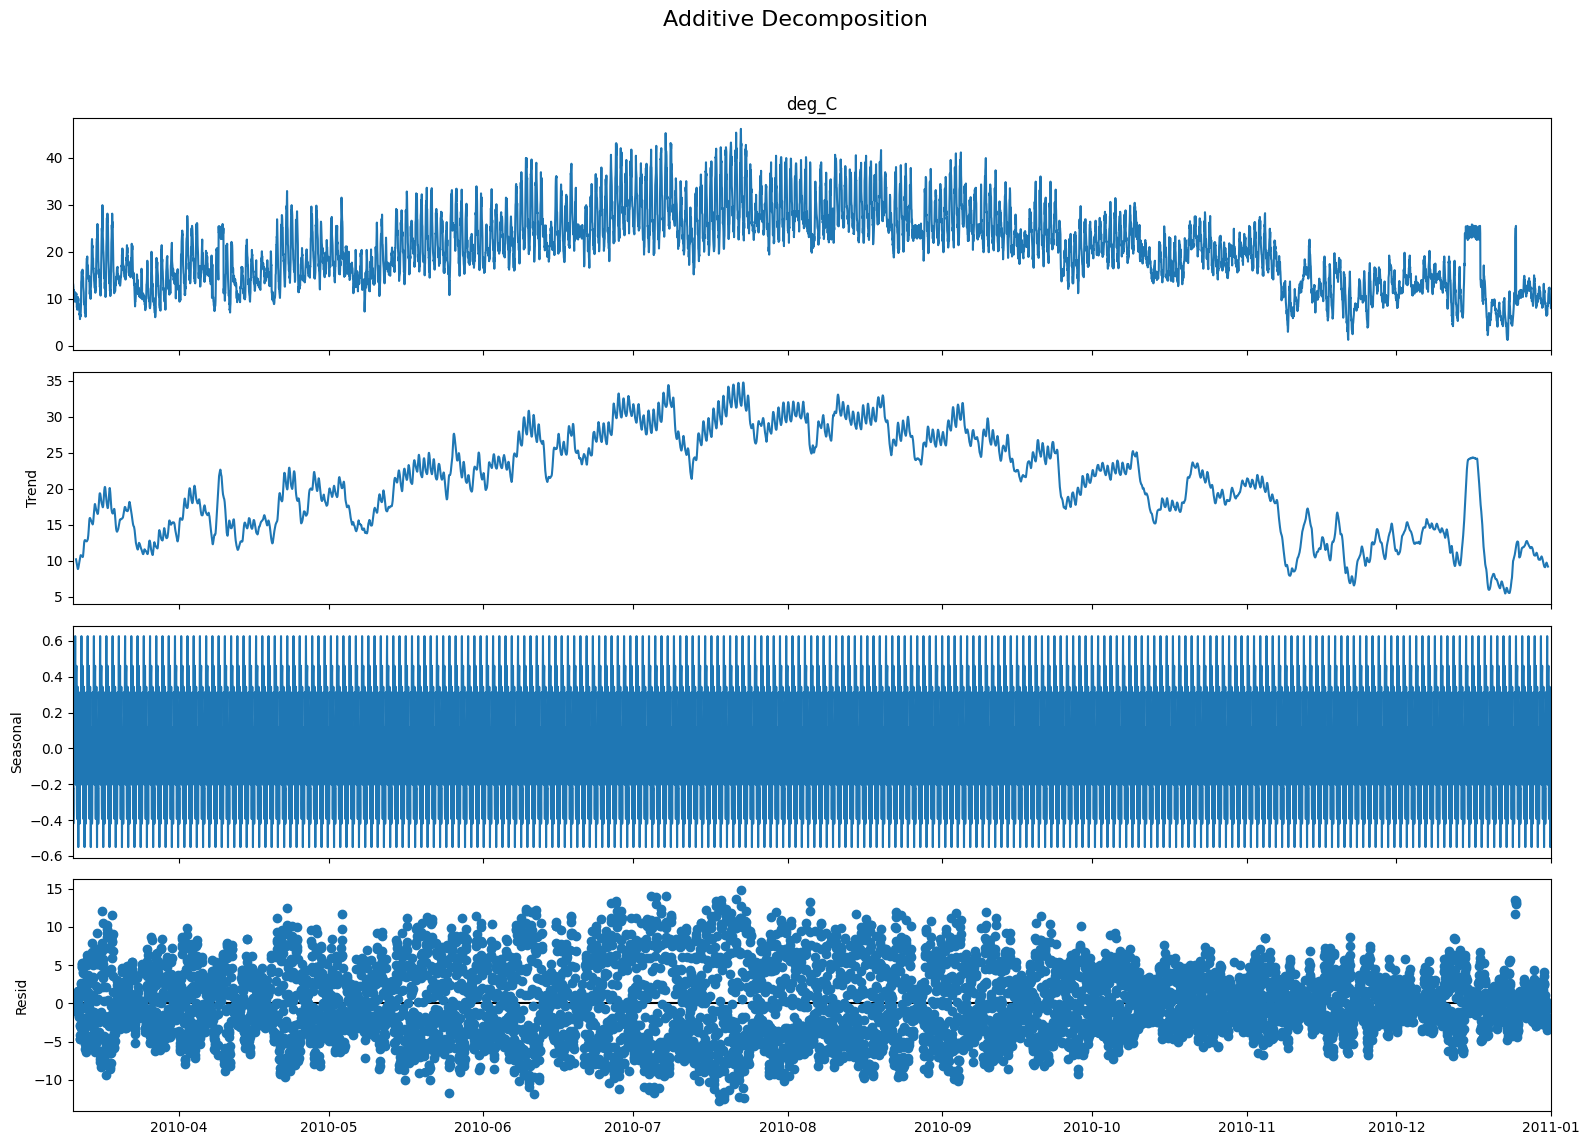

In [47]:
multiplicative_decomposition = seasonal_decompose(df_ts["deg_C"], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ts["deg_C"], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

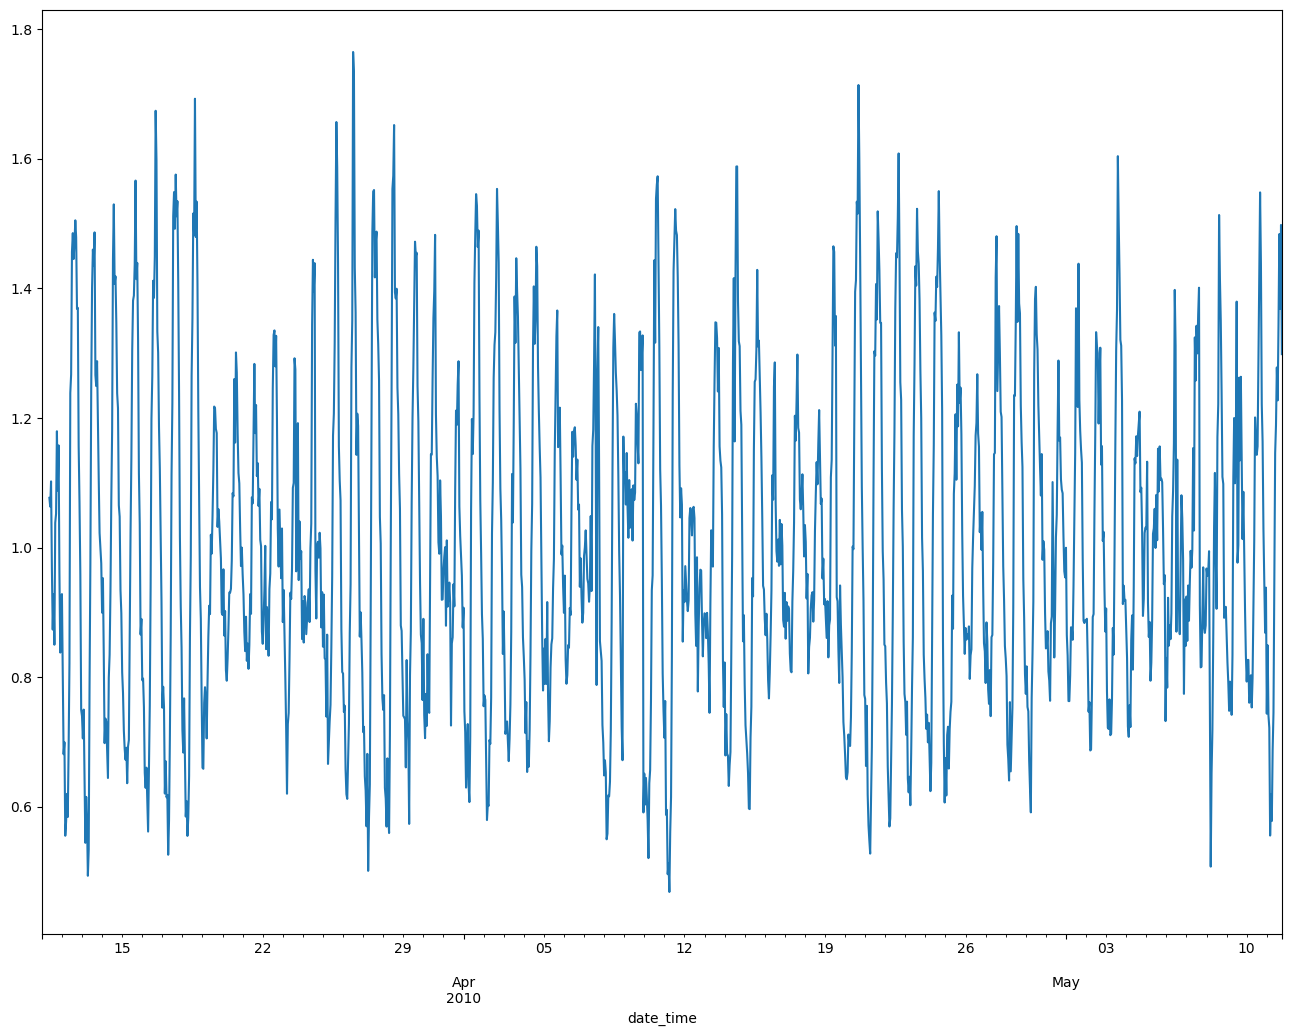

In [54]:
multiplicative_decomposition.resid["2010-03-11 00:00:00":"2010-05-11 18:00:00"].plot();

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]